In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

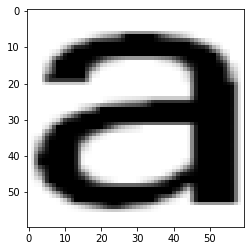

In [ ]:
img = mpimg.imread('drive/MyDrive/TrainA/a/2.png')
imgplot = plt.imshow(img,cmap='gray')
#plt.show()
data = pd.read_csv("drive/MyDrive/A_Z Handwritten Data.csv")

#https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format

In [ ]:
Adata=data.loc[data['0'] == 0]
otherdata = data[data['0'] != 0]
NotAdata=otherdata.sample(n=13869, random_state=1)
NotAdata['0'] =   NotAdata['0'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],1)
total= [Adata,NotAdata]
Final = pd.concat(total)
Final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27738 entries, 0 to 225817
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 166.3 MB


In [ ]:

#data.info()
#Adata=data.loc[data['0'] == 0]
#Adata.info()

X = Final.drop('0',axis = 1) # axis=1 for dropping column
y = Final['0']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.4)

X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))
#plt.imshow(X_train[5],cmap='gray')

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_test.shape)

train_yOHE = to_categorical(Y_train, num_classes = 2, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(Y_test, num_classes = 2, dtype='int')

print("New shape of test labels: ", test_yOHE.shape)

New shape of train data:  (16642, 28, 28, 1)
New shape of train data:  (11096, 28, 28, 1)
New shape of train labels:  (16642, 2)
New shape of test labels:  (11096, 2)


In [ ]:
'''
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'drive/MyDrive/TrainA',
    target_size = (60,60),
    batch_size = 4,
    class_mode = 'categorical',
    #color_mode="rgb"

)

test_generator = test_datagen.flow_from_directory(
    directory = 'drive/MyDrive/TestA',
    target_size = (60,60),
    batch_size = 4,
    class_mode = 'categorical',
    #color_mode="rgb"

)
'''

'\ntrain_datagen = ImageDataGenerator(rescale = 1./255,\n                                   shear_range = 0.2,\n                                   zoom_range = 0.2,\n                                   horizontal_flip = True)\n\ntest_datagen = ImageDataGenerator(rescale = 1./255)\n\ntrain_generator = train_datagen.flow_from_directory(\n    directory = \'drive/MyDrive/TrainA\',\n    target_size = (60,60),\n    batch_size = 4,\n    class_mode = \'categorical\',\n    #color_mode="rgb"\n\n)\n\ntest_generator = test_datagen.flow_from_directory(\n    directory = \'drive/MyDrive/TestA\',\n    target_size = (60,60),\n    batch_size = 4,\n    class_mode = \'categorical\',\n    #color_mode="rgb"\n\n)\n'

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(units = 2, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history = model.fit(X_train, train_yOHE, epochs=8,  validation_data = (X_test,test_yOHE))

Epoch 1/8
521/521 [==============================] - 14s 9ms/step - loss: 0.1850 - accuracy: 0.9644 - val_loss: 0.0384 - val_accuracy: 0.9881
Epoch 2/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0390 - accuracy: 0.9863 - val_loss: 0.0401 - val_accuracy: 0.9885
Epoch 3/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 4/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0778 - val_accuracy: 0.9741
Epoch 5/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0290 - val_accuracy: 0.9927
Epoch 6/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 7/8
521/521 [==============================] - 4s 8ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0302 - val_accuracy: 0.9935
Epoch 8/8
52



The Prediction of the Image is: NOT A


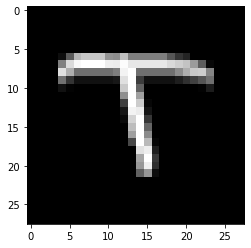

In [ ]:
a=model.predict(x=X_test[500:510])
result = get_result(a[7])
plt.imshow(X_test[507][:,:,0],cmap='gray')

print('\n')
print(result)


In [ ]:
def get_result(result):
    if round(result[0]) == 1:
        return('The Prediction of the Image is: the letter A')
    else:
        return ('The Prediction of the Image is: NOT A')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
colab_pdf('DataScienceProjectCNN.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DataScienceProjectCNN.ipynb to pdf
[NbConvertApp] Support files will be in DataScienceProjectCNN_files/
[NbConvertApp] Making directory ./DataScienceProjectCNN_files
[NbConvertApp] Making directory ./DataScienceProjectCNN_files
[NbConvertApp] Writing 41998 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 46018 bytes to /content/drive/My Drive/DataScienceProjectCNN.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'